# EDA basics

# Setup
## import

In [48]:
import os
import sys
import glob
import matplotlib.pyplot as plt

In [31]:
import librosa
import librosa.display as ldisp
import numpy as np

In [26]:
#import scpiy.signal as sig # TODO install env

## Macro and File access paths

In [13]:
FOLDER_ROOT = '../../'
NORMAL = 'normal'
ABNORM = 'abnormal'
EXT = 'wav'
#--- LOAD single file
MACHINE = 'fan'
ID = '00'

In [23]:
def get_file_path(normal=True):
    if normal == True:
        n = NORMAL
    else: 
        n= ABNORM
    
    return sorted(glob.glob(os.path.abspath( "{base}/{SNR}/{machine}/id_{ID}/{n}/*.{ext}".format(
        base=FOLDER_ROOT+'dataset',SNR='6dB',machine='fan',ID='00', n=n,ext=EXT ))))


nfp = get_file_path(normal=True)
afp = get_file_path(normal=False)

In [56]:
def laod_n_a_file(nr=0,nra=None):
    if nra==None:
        nra=nr
    
    nfp = get_file_path(normal=True)
    afp = get_file_path(normal=False)
    n  = librosa.load(nfp[nr], sr=None, mono=False)
    a  = librosa.load(afp[nra], sr=None, mono=False)
    return n, a

In [78]:
def get_channel(librosa_wav_tuple, ch=0):
    # return a single channel values
    return librosa_wav_tuple[0][ch,:]

def get_sr(librosa_wav_tuple): 
    # return sample rate
    return librosa_wav_tuple[1]

# pick a and n file - plot waveplot

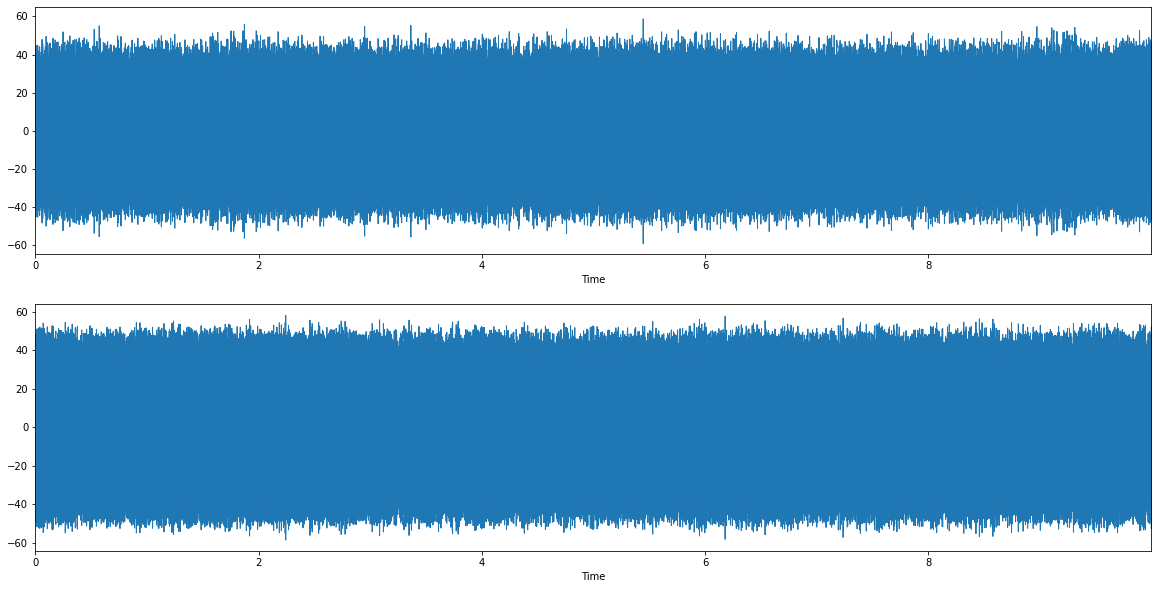

In [98]:
# load and plot
a, n = laod_n_a_file(nr=2)

# this will plot channel 1
plt.figure(figsize=(20,10))
plt.subplot(211)
ldisp.waveplot(librosa.amplitude_to_db(get_channel(n,0)), sr=get_sr(n))
plt.subplot(212)
ldisp.waveplot(librosa.amplitude_to_db(get_channel(a,0)), sr=get_sr(a))

In [65]:
(a[0])[0,:].shape

(160000,)

In [63]:
a[0].shape

(8, 160000)

In [67]:
# plot all 8 channels

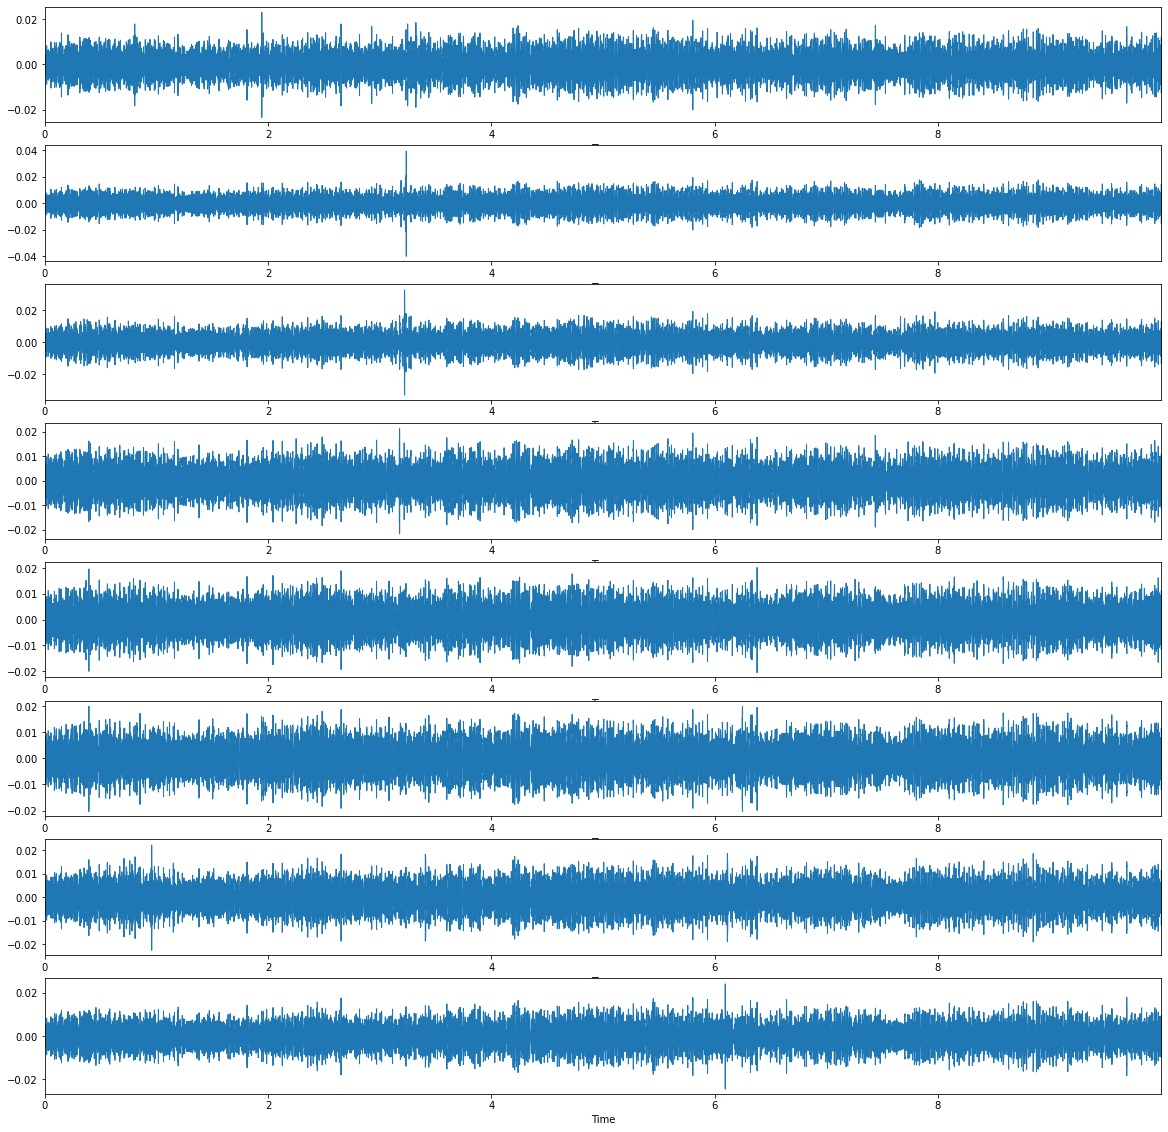

In [75]:
plt.figure(figsize=(20,20))
for i in range(8):
    plt.subplot(811+i)
    ldisp.waveplot(a[0][i,:], sr=n[1])

# Librose Feature extraction

In [80]:
import librosa.feature as lfeat

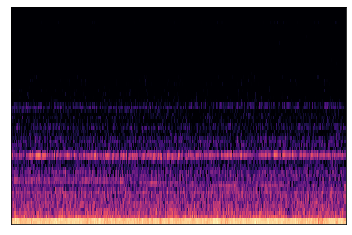

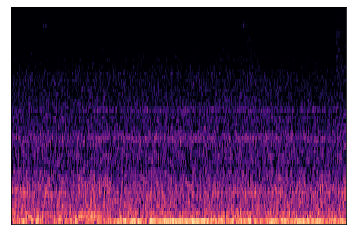

In [111]:
def mel_spectra_plot(r):
    melspec= lfeat.melspectrogram(y=get_channel(r,0),
                             sr=get_sr(r),
                             n_mels=64,
                             n_fft=512,
                             hop_length=256,
                             power=2.0)
    
    ldisp.specshow(librosa.amplitude_to_db(melspec), sr=get_sr(a))
    
    
mel_spectra_plot(n)
plt.show()
mel_spectra_plot(a)

In [114]:
np.abs(librosa.fft_frequencies(get_channel(a,0)))

TypeError: only size-1 arrays can be converted to Python scalars

In [96]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(get_channel(a,0))), ref=np.max)


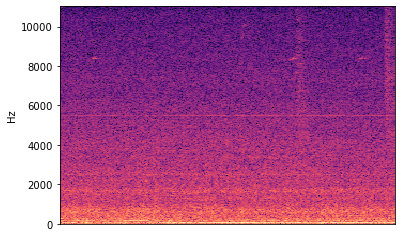

In [97]:
librosa.display.specshow(D, y_axis='linear')